Classwork: https://colab.research.google.com/drive/1EYU9d-yvnXuDgaUeBSzRtXV7_Xq4K557

Домашнее задание - исследовать датасет задержек авиарейсов из Нью-Йорка в 2013 году.

Ссылка на датасет статистики авиарейсов: https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv

Замечание: в Нью-Йорке 3 аэропорта:
John F. Kennedy International Airport (JFK)
LaGuardia Airport (LGA)
Newark International Airport (EWR)

В отдельной таблице приведена статистика погоды за 2013 в аэропорту EWR (можно считать что погода во всех 3 аэропортах одинаковая):
https://github.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/blob/master/weather.csv

Ваша задача - предоставить отчет, раскрывающий характер и особенности задержек рейсов и способствующий принятию решений руководством аэропортов.

Отчет должен быть оформлен в виде ноутбука с четкой структурой. Вначале в ячейке Markdown идет краткое описание исследуемого вопроса (что будем изучать), затем код и все его выводы (таблицы, графики, значения), после этого снова в ячейке Markdown ваш краткий вывод из полученного результата (о чем он говорит).

В отчете должно быть не менее 10 содержательных выводов, подтвержденных данными. Для разнообразия материала используйте не меньше 5 различных типов диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, цветовая схема и т.д.).

Для решения задач используйте предпочтительно pandas.

Жду ваших PR.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
    
flights = pd.read_csv(url1, sep=',') 
weather = pd.read_csv(url2, sep=',')




#len(flights), flights.shape
flights.tail()
#weather.tail()



,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [3]:
weather.tail()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
8714,8715,JFK,2013,9.0,2.0,20.0,75.20,73.40,94.14,200.0,4.60312,5.297178,0.0,NaN,4.0
8715,8716,JFK,2013,10.0,23.0,10.0,48.92,39.02,68.51,60.0,4.60312,5.297178,0.0,1008.1,10.0
8716,8717,JFK,2013,10.0,23.0,11.0,48.92,39.02,68.51,40.0,4.60312,5.297178,0.0,1008.5,10.0
8717,8718,JFK,2013,12.0,17.0,5.0,26.96,10.94,50.34,40.0,4.60312,5.297178,0.0,1023.9,10.0
8718,8719,LGA,2013,8.0,22.0,22.0,75.92,66.92,73.68,210.0,8.05546,9.270062,0.0,1011.9,10.0


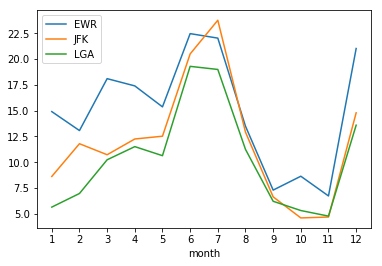

In [6]:
ts = flights.groupby([ 'origin','month'])['dep_delay'].mean()

ts['EWR'].plot(label = 'EWR')
ts['JFK'].plot(label = 'JFK')
ts['LGA'].plot(label = 'LGA')
plt.xticks(range(1,13,1))
plt.legend(loc = 'best', fontsize = 10)
#ts.legend(('EWR','JFK','LGA'))

#ts.set_xlabel('Month')
#ts.set_ylabel('Average departure delay')


# df = df.cumsum()

# In [8]: plt.figure();

# In [9]: df.plot();


As we can observe there average departure delay the beiggest on summer.
Let's find out why.

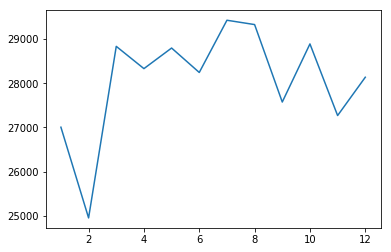

In [5]:
 a = np.zeros((12,2))


 for i in range(1,13, 1):
     a[i-1, 0]+=len(flights[flights['month'] == i]['dep_delay'])
     a[i-1, 1]=i

 plt.plot( a[:, 1], a[:,0])
 plt.show()